In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter


In [2]:
with open('Labs/Labb 2/datapoints.txt', 'r') as datafile:
    data = datafile.read().splitlines()

data.pop(0)

points = []
for row in data:
    w, h, label = row.split(',')
    w = float(w.strip())
    h = float(h.strip())
    label = int(label.strip())
    points.append((w, h, label))

points = np.array(points)

X = points[:, :2]
y = points[:, 2]

print("Data loaded:")
print(X[:5], y[:5])


Data loaded:
[[21.9593845  31.23956701]
 [23.63591632 36.46821491]
 [17.71405642 31.44170391]
 [21.78020032 33.21339776]
 [25.20630553 36.55881615]] [0. 1. 0. 1. 1.]


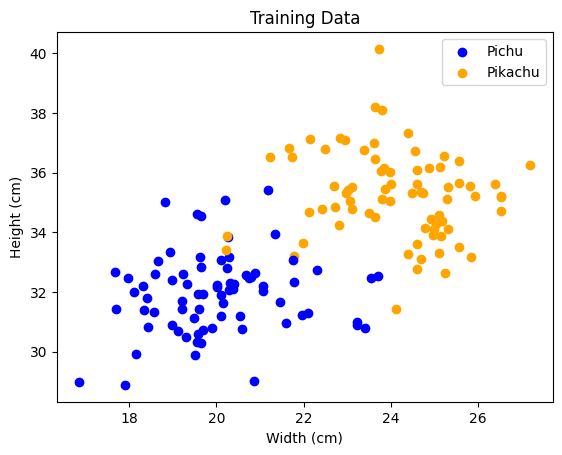

In [3]:
for i in range(len(X)):
    if y[i] == 0:
        plt.scatter(X[i, 0], X[i, 1], color='blue', label='Pichu' if i == 0 else "")
    else:
        plt.scatter(X[i, 0], X[i, 1], color='orange', label='Pikachu' if i == 1 else "")

plt.xlabel("Width (cm)")
plt.ylabel("Height (cm)")
plt.title("Training Data")
plt.legend()
plt.show()


In [4]:
from collections import Counter

def distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def classify_1nn(new_point, X, y):
    min_dist = float('inf')
    label = None
    for i in range(len(X)):
        d = distance(new_point, X[i])
        if d < min_dist:
            min_dist = d
            label = y[i]
    return label

def classify_knn(new_point, X, y, k=10):
    distances = []
    for i in range(len(X)):
        d = distance(new_point, X[i])
        distances.append((d, y[i]))
    distances.sort(key=lambda x: x[0])
    k_nearest = [label for _, label in distances[:k]]
    majority_vote = Counter(k_nearest).most_common(1)[0][0]
    return majority_vote


Point (25, 32) is classified as Pikachu (k-NN)
Point (24.2, 31.5) is classified as Pikachu (k-NN)
Point (22, 34) is classified as Pikachu (k-NN)
Point (20.5, 34) is classified as Pichu (k-NN)


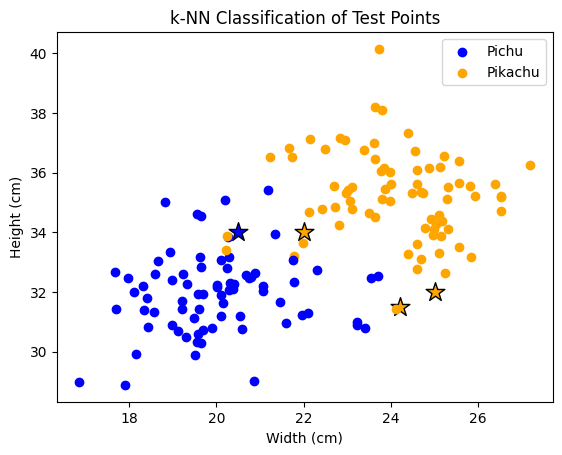

In [5]:
test_points = [(25, 32), (24.2, 31.5), (22, 34), (20.5, 34)]

for tp in test_points:
    label = classify_knn(tp, X, y, k=10)
    color = 'blue' if label == 0 else 'orange'
    plt.scatter(tp[0], tp[1], color=color, edgecolor='black', s=200, marker='*')
    print(f"Point {tp} is classified as {'Pichu' if label == 0 else 'Pikachu'} (k-NN)")

for i in range(len(X)):
    if y[i] == 0:
        plt.scatter(X[i, 0], X[i, 1], color='blue', label='Pichu' if i == 0 else "")
    else:
        plt.scatter(X[i, 0], X[i, 1], color='orange', label='Pikachu' if i == 1 else "")

plt.xlabel("Width (cm)")
plt.ylabel("Height (cm)")
plt.title("k-NN Classification of Test Points")
plt.legend()
plt.show()


Enter width (cm):  40
Enter height (cm):  30


Your point (40.0, 30.0) is classified as Pikachu


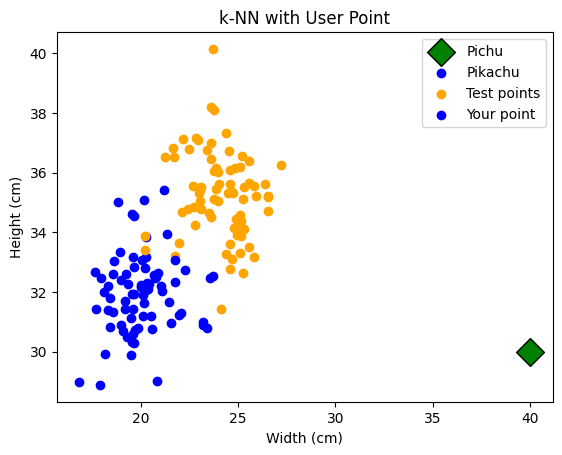

In [6]:
def get_user_point():
    while True:
        try:
            w = float(input("Enter width (cm): "))
            h = float(input("Enter height (cm): "))
            if w <= 0 or h <= 0:
                print("Error: Width and height must be positive numbers. Try again.")
                continue
            return (w, h)
        except ValueError:
            print("Error: Please enter only numeric values. Try again.")

user_point = get_user_point()
label = classify_knn(user_point, X, y, k=10)
print(f"Your point {user_point} is classified as {'Pichu' if label == 0 else 'Pikachu'}")

plt.scatter(user_point[0], user_point[1], color='green', edgecolor='black', s=200, marker='D')

for i in range(len(X)):
    if y[i] == 0:
        plt.scatter(X[i, 0], X[i, 1], color='blue', label='Pichu' if i == 0 else "")
    else:
        plt.scatter(X[i, 0], X[i, 1], color='orange', label='Pikachu' if i == 1 else "")

plt.xlabel("Width (cm)")
plt.ylabel("Height (cm)")
plt.title("k-NN with User Point")
plt.legend(['Pichu', 'Pikachu', 'Test points', 'Your point'])
plt.show()
